# Wrangle and Analyze WeRateDogs tweeter data

In [1]:
# import all needed libraries
import pandas as pd
import numpy as np
import requests
import json
import re
import matplotlib.pyplot as plt
%matplotlib inline

## Gather

In [2]:
# load provided twitter-archive-enhanced.csv with archived tweets data to DataFrame
tweets = pd.read_csv("twitter-archive-enhanced.csv")
tweets.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [3]:
# download image-predictions.tsv from the web url
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

# save it to file image-predictions.tsv
with open("image-predictions.tsv", mode="wb") as file:
    file.write(response.content)

# load image-predictions.tsv data to DataFrame
img_predictions = pd.read_csv("image-predictions.tsv", sep="\t")
img_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [4]:
# gather additional tweet's info through Twitter's API
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [5]:
# see what data is in the recieved tweet's info (check first tweet)
with open("tweet-json.txt", encoding='utf-8') as file:
    tweet_data = file.readline()
    tweet_json = json.loads(tweet_data)
    print(json.dumps(tweet_json, sort_keys=True, indent=4))

{
    "contributors": null,
    "coordinates": null,
    "created_at": "Tue Aug 01 16:23:56 +0000 2017",
    "display_text_range": [
        0,
        85
    ],
    "entities": {
        "hashtags": [],
        "media": [
            {
                "display_url": "pic.twitter.com/MgUWQ76dJU",
                "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1",
                "id": 892420639486877696,
                "id_str": "892420639486877696",
                "indices": [
                    86,
                    109
                ],
                "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg",
                "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg",
                "sizes": {
                    "large": {
                        "h": 528,
                        "resize": "fit",
                        "w": 540
                    },
                    "medium": {
                        "h": 52

In [6]:
# fill the List with dictionaries of some data from JSON, to later convert to a DataFrame
df_list = []
with open("tweet-json.txt", encoding='utf-8') as file:
    for tweet_data in file:
        tweet_json = json.loads(tweet_data)
        df_list.append({
            "id": tweet_json["id"],
            "favorite_count": tweet_json["favorite_count"],
            "retweet_count": tweet_json["retweet_count"]
        })
        tweet_json = file.readline()
        
# load additional tweet's info to DataFrame
tweets_info = pd.DataFrame(df_list, columns = ["id", "favorite_count", "retweet_count"])
tweets_info.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,891815181378084864,25461,4328
2,891327558926688256,41048,9774
3,890971913173991426,12041,2158
4,890609185150312448,28226,4429


## Assess

### Visual assessment

In [7]:
# display all tweets
tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


We can see that some dog names are extracted as "a", "an" and "the".  
Also columns **doggo**, **floofer**, **pupper** and **puppo** should be combined into one column since they represent one variable: dog "stage".  
Nulls represented as string "None" for columns **name**, **doggo**, **floofer**, **pupper** and **puppo**.

In [8]:
# display img_predictions
img_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


Here we can see inconsistency in dog bread names. Some of them start with capital letter and some contain "_".

In [9]:
# display tweets_info
tweets_info

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,891815181378084864,25461,4328
2,891327558926688256,41048,9774
3,890971913173991426,12041,2158
4,890609185150312448,28226,4429
5,890006608113172480,31166,7624
6,889665388333682689,38818,8538
7,889531135344209921,15359,2321
8,888917238123831296,29611,4709
9,888554962724278272,20290,3732


I don't see any quality issues in this table by visual assessment.  

All tables consist of properties of tweets, so they should be combined in one table.  
There are missing records (1177 in img_predictions vs 2356 in tweets). Maybe some tweets got deleted from Tweeter server. We can’t clean that data.

### Programmatic assessment

In [10]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

There are 181 retweet related records. We are not interested in retweets, so we don't need records with not empty **retweeted_status_id**. Also we don't need columns with information about retweet (**retweeted_status_id**, **retweeted_status_user_id**, **retweeted_status_timestamp**).  
**timestamp** has type "string" instead of "datetime".

In [11]:
img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
tweets_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 3 columns):
id                1177 non-null int64
favorite_count    1177 non-null int64
retweet_count     1177 non-null int64
dtypes: int64(3)
memory usage: 27.7 KB


In [13]:
tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Min value for **rating_denominator** equals 0. That doesn't seem right.

In [14]:
img_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
tweets_info.describe()

,id,favorite_count,retweet_count
count,1.177000e+03,1177.000000,1177.000000
mean,7.427463e+17,8260.755310,3222.255735
std,6.856773e+16,12088.982006,5106.835873
min,6.660293e+17,0.000000,0.000000
25%,6.783997e+17,1499.000000,634.000000
50%,7.195514e+17,3705.000000,1483.000000
75%,7.993088e+17,10202.000000,3737.000000
max,8.924206e+17,132810.000000,52360.000000


Let's check for duplicates.

In [16]:
sum(tweets.duplicated("tweet_id"))

0

In [17]:
sum(img_predictions.duplicated("tweet_id"))

0

In [18]:
sum(tweets_info.duplicated("id"))

0

There are no duplicated tweets.  

During visual assessment I noticed that tweet with tweet_id = 666287406224695296 has rating 1/2. That doesn't look right. Let's check the tweet text.

In [19]:
tweets.query("tweet_id == 666287406224695296").text.iloc[0]

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

It seems, that first instance of "#/#" was used to extract rating, and the last would be more accurate.

#### Quality

- *tweets* table
    1. We are not interested in retweets, so we don't need records with not empty **retweeted_status_id**. Also we don't need columns with information about retweet (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
    2. **timestamp** is a string instead of datetime
    3. Nulls represented as string "None" for column **name**
    4. Nulls represented as string "None" for **doggo**, **floofer**, **pupper** and **puppo**
    5. Some dog names extracted as "a", "an", "the"
    6. Invalid values for **rating_numerator** (for example, for tweet_id = 666287406224695296 value is 1 instead of 9).
    7. Invalid values for **rating_denominator** (min = 0; also for tweet_id = 666287406224695296 value is 2 instead of 10)
- *img_predictions* table
    1. Some dog breads start with capital letter and contain "_"
- *tweets_info* table
    1. Missing records (1177 instead of 2356) **(can't clean, maybe tweets got deleted)**

#### Tidiness

1. One variable (dog "stage") in 4 separate columns: **doggo**, **floofer**, **pupper** and **puppo**.
2. All tables consist of properties of tweets, so they should be combined in one table.



## Clean

In [20]:
# create copies of DataFrames
tweets_clean = tweets.copy()
img_predictions_clean = img_predictions.copy()
tweets_info_clean = tweets_info.copy()

### Tidiness

#### One variable (dog "stage") in 4 separate columns: **doggo**, **floofer**, **pupper** and **puppo**

##### Define

Combine values from columns **doggo**, **floofer**, **pupper** and **puppo** in one new column **stage** and then drop the old ones.

##### Code

In [21]:
# combine columns in new column
tweets_clean["stage"] =\
        tweets_clean["doggo"] + "|" +\
        tweets_clean["floofer"] + "|" +\
        tweets_clean["pupper"] + "|" +\
        tweets_clean["puppo"]
# drop old columns
tweets_clean = tweets_clean.drop(["doggo", "floofer", "pupper", "puppo"], axis=1)

##### Test

In [22]:
# confirm columns are gone
list(tweets_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'stage']

In [23]:
# check some values in new column
tweets_clean.stage.sample(5)

2304      None|None|None|None
2140      None|None|None|None
1524      None|None|None|None
836       None|None|None|None
1304    None|None|pupper|None
Name: stage, dtype: object

#### All tables consist of properties of tweets, so they should be combined in one table.

##### Define
Merge all 3 tables into one.

##### Code

In [24]:
# merge DataFrames
df = tweets_clean.merge(tweets_info_clean, how="left", left_on='tweet_id', right_on='id')
df = df.merge(img_predictions_clean, how="left", on='tweet_id')
# drop extra id column
df = df.drop("id", axis=1)

##### Test

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
stage                         2356 non-null object
favorite_count                1177 non-null float64
retweet_count                 1177 non-null float64
jpg_url                       2075 non-null object
img_num                       

In [26]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Quality

#### We are not interested in retweets, so we don't need records with not empty **retweeted_status_id**. Also we don't need columns with information about retweet (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

##### Define

Drop records with not empty **retweeted_status_id**.  
Drop columns **retweeted_status_id**, **retweeted_status_user_id**, **retweeted_status_timestamp**

##### Code

In [27]:
# drop records with not empty retweeted_status_id and retweet related columns
df = df[df["retweeted_status_id"].isna()]
df = df.drop(["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], axis=1)

##### Test

In [28]:
# we should have 2356 - 181 = 2175 records and 27 - 3 = 24 columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
stage                    2175 non-null object
favorite_count           1090 non-null float64
retweet_count            1090 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf             

#### **timestamp** is string, not datetime

##### Define

Convert column **timestamp** to datetime type.

##### Code

In [29]:
# convert to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"])

##### Test

In [30]:
df["timestamp"].sample(5)

2329   2015-11-16 21:54:18
1080   2016-06-04 00:32:32
1267   2016-03-15 02:25:31
1726   2015-12-24 16:00:30
1975   2015-12-05 04:36:04
Name: timestamp, dtype: datetime64[ns]

#### Nulls represented as string "None" for column **name**

##### Define

Replace string "None" with np.nan.

##### Code

In [31]:
# replace string "None" with np.nan.
df["name"] = df["name"].apply(lambda x: np.nan if x == "None" else x)

##### Test

In [32]:
sum(df.name.isnull())

680

#### Nulls represented as string "None" for **doggo**, **floofer**, **pupper** and **puppo**

##### Define

Remove all string values "None" from column **stage**.

##### Code

In [33]:
# remove all string values "None" from column stage
def remove_none(x):
    x = x.replace("None|","").replace("|None","")
    return np.nan if x == "None" else x

df["stage"] = df["stage"].apply(remove_none)

##### Test

In [34]:
df["stage"].sample(10)

1221    NaN
154     NaN
651     NaN
955     NaN
1054    NaN
528     NaN
1124    NaN
164     NaN
1029    NaN
820     NaN
Name: stage, dtype: object

#### Some dog names extracted as "a", "an", "the"

##### Define

Replace strings "a", "an" and "the" with np.nan.

##### Code

In [35]:
# replace strings "a", "an" and "the" with np.nan.
df["name"] = df["name"].apply(lambda x: np.nan if (x == 'a' or x == 'an' or x == 'the') else x)

##### Test

In [36]:
df.query("name == 'a' | name == 'an' | name == 'the'")["name"].count()

0

#### Invalid values for **rating_numerator** (for example, for tweet_id = 666287406224695296 value is 1 instead of 9)

##### Define

It seems, that first instance of "#/#" was used to extract rating, and the last would be more accurate.  
Extract the last instance of "#/#" for rating and use first number for **rating_numerator**.

##### Code

In [37]:
df["new_rating"] = df["text"].apply(lambda x: re.findall('(\d+/\d+)', x)[-1])

In [38]:
# display old and new ratings for changed records
df[(df["rating_numerator"].astype(str) + "/" + df["rating_denominator"].astype(str)) != df["new_rating"]]\
[["rating_numerator","rating_denominator","new_rating"]]

,rating_numerator,rating_denominator,new_rating
55,17,10,13/10
313,960,0,13/10
387,7,10,007/10
766,12,10,11/10
1007,10,10,7/10
1068,9,11,14/10
1165,4,20,13/10
1202,50,50,11/10
1222,10,10,8/10
1359,9,10,2/10


In [39]:
# fill new value for rating_numerator
df["rating_numerator"] = df["new_rating"].apply(lambda x: int(x.split("/")[0]))

##### Test

In [40]:
df.query("tweet_id == 666287406224695296")[["rating_numerator","rating_denominator","new_rating"]].iloc[0]

rating_numerator         9
rating_denominator       2
new_rating            9/10
Name: 2335, dtype: object

#### Invalid values for **rating_denominator** (min = 0; also for tweet_id = 666287406224695296 value is 2 instead of 10)

##### Define

From our extracted **new_rating** use second number for **rating_denominator**.

##### Code

In [41]:
# fill new value for rating_denominator
df["rating_denominator"] = df["new_rating"].apply(lambda x: int(x.split("/")[1]))
df = df.drop(["new_rating"], axis=1)

##### Test

In [42]:
df.query("tweet_id == 666287406224695296")[["rating_numerator","rating_denominator"]].iloc[0]

rating_numerator       9
rating_denominator    10
Name: 2335, dtype: int64

In [43]:
df["rating_denominator"].describe()

count    2175.000000
mean       10.477241
std         6.958764
min         7.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

#### Some dog breads start with capital letter and contain "_"

##### Define

Transform columns **p1**, **p2** and **p3** to lower case and change "\_" with space.

##### Code

In [44]:
# transform dog breads to lower case and remove "_"
df["p1"] = df["p1"].str.lower().str.replace("_"," ")
df["p2"] = df["p2"].str.lower().str.replace("_"," ")
df["p3"] = df["p3"].str.lower().str.replace("_"," ")

##### Test

In [45]:
df[["p1","p2","p3"]].head()

,p1,p2,p3
0,orange,bagel,banana
1,chihuahua,pekinese,papillon
2,chihuahua,malamute,kelpie
3,paper towel,labrador retriever,spatula
4,basset,english springer,german short-haired pointer


## Store and Analyze

In [46]:
# save cleaned data to twitter_archive_master.csv
df.to_csv("twitter_archive_master.csv", index=False)

Based on the data, I gathered, assessed and cleaned, I would like to do some analysis.  
I want to see what the top 10 breads in this dataset are.

In [47]:
# get top 10 recognized breads.
top10_breads = df.p1.value_counts()[0:10]
top10_breads

golden retriever      139
labrador retriever     95
pembroke               88
chihuahua              79
pug                    54
chow                   41
samoyed                40
toy poodle             38
pomeranian             38
malamute               29
Name: p1, dtype: int64

Next, I am interested in rating distribution.

In [48]:
# calculate rating
ratings = df["rating_numerator"] / df["rating_denominator"]
ratings.describe()

count    2175.000000
mean        1.223040
std         4.246825
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
dtype: float64

max = 177.6 and 3rd quartile is 1.2. That means, that there are some extreme outliers.  
Let's 

In [49]:
# get rid of outliers
ratings = ratings[ratings < 2]
ratings.describe()

count    2166.000000
mean        1.060703
std         0.222397
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max         1.500000
dtype: float64

There were 2175 - 2166 = 9 extreme outliers.

Text(0.5, 1.0, 'Distribution of Rating')

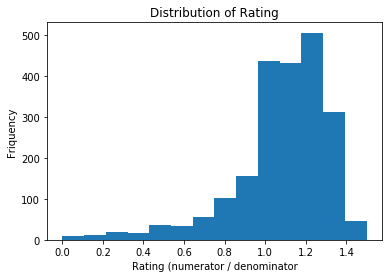

In [50]:
# plot distribution histogram
plt.hist(ratings, bins=14)
plt.xlabel('Rating (numerator / denominator')
plt.ylabel('Friquency')
plt.title('Distribution of Rating')

The distribution is left skewed.That is also supported by the value of mean = 1.06 and median = 1.1. Half of values are between 1 and 1.2.  

Now I want to see if Favorite Count is correlated with Retweet Count.

Text(0.5, 1.0, 'Correlation between Favorite Count and Retweet Count')

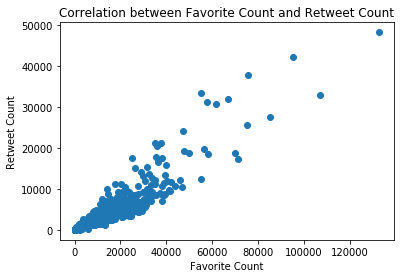

In [51]:
# scatter plot of favorite_count and retweet_count
plt.scatter(df.favorite_count, df.retweet_count)
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.title('Correlation between Favorite Count and Retweet Count')

This scatter plot shows positive correlation between Favorite Count and Retweet Count